# Chapter 1: Exploratory Data Analysis (EDA)

**Question: What is EDA?** \\
Answer: Loosely speaking, any method of looking at the data that does not include statistical modelling and inference falls under EDA.
  <br> \\
**Question: Why EDA?** \\
Answer: EDA is critical first step in analyzing data:


*   Detection of mistakes
*   Checking of assumptions
*   Preliminary selection of models
*   Determination of relationships between explanatory variables and outcome variables

##1.1 Typical Data Format and Types of EDA

It starts with a research objective. Once the research objective is defined, experiment design is prepared and susequently data is collected. Data is categorized into two categories: \\

*   Structured Data: Rectangular array, where each row is a subject and each column is the outcome variable of the experiment. Each column can be categorized into:
    1.   Numerical Data (Quantitative)
    *   Discrete Data: Countable values with no intermediate values between the data points. Example- No. of students in a class.
    *   Continious Data: Can take any value with a range. Example: Height of employees within a department.

  2.   Non-numerical Data (Qualitative/Categorical)
  *   Nominal Data: Categories with no inherent order. Example- Gender, color etc.
  *   Ordinal Data: Categories with a meaningful order but intervals between the data does not have a natural meaning. Example: Military ranks, education level etc.  

*   Unstructured Data: Audio data, text data, video data etc

*We will focus our attention on the structured data in this tutotial. Please see the second part of this tutorial for EDA on unstructured data, focus on text data.*




Structured data are big in size (hundreads of rows and columns) and it is difficult for brain to make sense of such big data. EDA techniques are developed as an aid, which partially to fully hide certain aspect of the data and make the other aspects visible. \\
EDA is cross-classified into two ways:
*   Graphical and non-graphical
*   Univariate and multivariate

*One need not to follow the defined methods only, EDA could be very unique as per data and requirement. It is an experimental ground to play with data.*

# 1.2 Univariate Non-graphical Method

Analysis done on the data of a particular variable for all the subjects is called univariate analysis. Measurements for this variable is called **Sample Distribution**, which in turn more or less represnt the **Population Distribution**.

The goal of univariate non-graphical EDA is to better appreciate Sample Distribution, make tentative conculsions about Population Distribution and detect outliers from the data.

## 1.3 Non-numerical Data

The characteristics of interest for a non-numerical variable are simply the range of values and the frequency (or relative frequency) of occurrence for each value. Therefore the only useful univariate non-graphical techniques for categorical variables is some form of tabulation of the frequencies. \\
*Note that it is useful to have the total count (frequency) to verify that we have an observation for each subject that we recruited.*

## 1.4 Numerical Data

Univariate EDA for a numerical variable is a way to make prelim-
inary assessments about the population distribution
using the observed sample. \\
The characteristics of the population distribution are its center, spread, modality (number of peaks), shape (including “heaviness of the tails”), and outliers. \\
Our observed data represent just one sample out of an inﬁnite number of possible samples. The characteristics of our randomly observed sample are not inherently interesting, except to the degree that they represent the population that it came from.

In [ ]:
import random

# Define a small, clear population
population = [10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

# Representative sample: random sampling from entire population
sample_representative = random.sample(population, k=5)

# Non-representative sample: biased sampling (e.g., from upper end only)
sample_non_representative = random.sample([20, 22, 24, 26, 28], k=5)

# Output
print("Population:                 ", population)
print("Representative Sample:      ", sample_representative)
print("Non-Representative Sample:  ", sample_non_representative)

Population:                  [10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
Representative Sample:       [20, 22, 10, 28, 16]
Non-Representative Sample:   [26, 28, 22, 20, 24]


**Sample Statistics** from data, such as **Sample Mean**, **Sample Variance**, **Sample Standard Deviation**, **Sample Skewness** and **Sample Kurtosis** etc vary from sample to sample and provide some uncertain information about Population Parameter.  

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis

def describe(data, name):
    print(f"\n{name}")
    print(f"  Mean:               {np.mean(data):.2f}")
    print(f"  Median:             {np.median(data):.2f}")
    print(f"  Std Dev (sample):   {np.std(data, ddof=1):.2f}")
    print(f"  Std Dev (pop):      {np.std(data, ddof=0):.2f}")
    print(f"  Range:              {max(data) - min(data)}")
    print(f"  Skewness:           {skew(data):.2f}")
    print(f"  Kurtosis:           {kurtosis(data):.2f}")

# Results
describe(population, "Population")
describe(sample_representative, "Representative Sample")
describe(sample_non_representative, "Non-Representative Sample")


Population
  Mean:               19.00
  Median:             19.00
  Std Dev (sample):   6.06
  Std Dev (pop):      5.74
  Range:              18
  Skewness:           0.00
  Kurtosis:           -1.22

Representative Sample
  Mean:               19.20
  Median:             20.00
  Std Dev (sample):   6.72
  Std Dev (pop):      6.01
  Range:              18
  Skewness:           -0.10
  Kurtosis:           -0.96

Non-Representative Sample
  Mean:               24.00
  Median:             24.00
  Std Dev (sample):   3.16
  Std Dev (pop):      2.83
  Range:              8
  Skewness:           0.00
  Kurtosis:           -1.30


Samples Statistics are best thought of as random (non-ﬁxed) **Estimates** of the ﬁxed, unknown Population Parameters.

## 1.5 Central Tendency

The central tendency refers to typical or middle values of a variable. The common, useful measures of central tendency are the statistics called (arithmetic) mean, median, and mode.

Mean could be for both, sample and population, but when we compute Sample Mean by the given formula, we are trying to estimate Population Mean. Formula for Population Mean is also same.

**Sample Mean** $= \bar{x} = \frac{∑_{i=1} ^n x_i}{n}$


In general, Mean is the "Balance Point". It becomes is the central point for particular cases (where distribution is symmetric). \\
**Balance Point** is the point at which the total distance of all data points to the left equals the total distance to the right. This implies that Mean is affected by the **outliers**. The is no univarsal definition for outliers, but a general understanding is that data points which are far off from majority of data points are called outliers.  In physics terms, if each data point were a weight placed on a number line, the mean would be the point where the beam balances — like a seesaw.

In [ ]:
data = [2, 4, 6, 8, 10]
mean_val = sum(data) / len(data)  # mean = 6

# Distances from the mean
left = [x - mean_val for x in data if x < mean_val]
right = [x - mean_val for x in data if x > mean_val]

print(f"Total left distance:  {sum(left):.1f}")
print(f"Total right distance: {sum(right):.1f}")

Total left distance:  -6.0
Total right distance: 6.0


**Sample Mean** varies from sample to sample, probability distribution associated with sample mean is called **Sample Distribution**.

**Median** is another measure of central tendency. It is the middle value after all the values are put in ordered list. If there are even number of values, take the average of the middle two values. Median need not to be unique, becuase the technical definition of Median is
For a random variable $X$, $m$ is the Median if it satisfies the followig two inequalities -
1.   $P(X<m) = 1/2$
2.   $P(X>m) = 1/2$

For symmetric distributions, the Mean and the Median coincide. For unimodal skewed (asymmetric) distributions, the Mean is farther in the direction of the “pulled out tail” of the distribution than the Median is. This is becuase Mean is affected by the outliers and Median is not affected by the outliers. Therefore, for many cases of skewed distributions, the median is preferred as a measure of central tendency.

A rarely used measure of central tendency is the **Mode**, which is the most likely or frequently occurring value $(x: x= argmax_{x_i} P(X=x_i))$

In symmetric, unimodal distributions, the Mode equals both the Mean and the Median. In unimodal, skewed distributions the Mode is on the other side of the Median from the Mean.

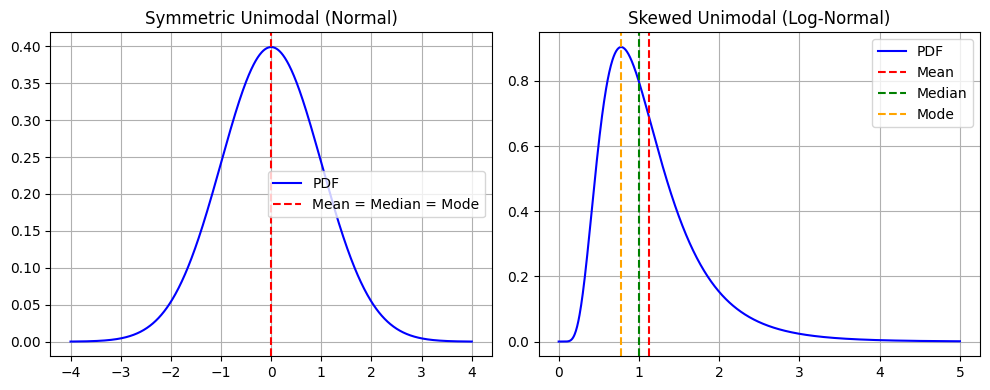

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Create figure with smaller size
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# ----- Case 1: Symmetric Unimodal (Standard Normal Distribution) -----
x = np.linspace(-4, 4, 1000)
pdf_sym = norm.pdf(x, loc=0, scale=1)

mean_sym = 0
median_sym = 0
mode_sym = 0

axs[0].plot(x, pdf_sym, label='PDF', color='blue')
axs[0].axvline(mean_sym, color='red', linestyle='--', label='Mean = Median = Mode')
axs[0].set_title('Symmetric Unimodal (Normal)')
axs[0].legend()
axs[0].grid(True)

# ----- Case 2: Skewed Unimodal (Log-Normal) -----
x = np.linspace(0, 5, 1000)
data_skew = np.random.lognormal(mean=0, sigma=0.5, size=10000)
pdf_skew = lognorm.pdf(x, s=0.5, scale=np.exp(0))

mean_skew = np.mean(data_skew)
median_skew = np.median(data_skew)
mode_skew = np.exp(0 - 0.5**2)  # Mode of lognormal

axs[1].plot(x, pdf_skew, label='PDF', color='blue')
axs[1].axvline(mean_skew, color='red', linestyle='--', label='Mean')
axs[1].axvline(median_skew, color='green', linestyle='--', label='Median')
axs[1].axvline(mode_skew, color='orange', linestyle='--', label='Mode')
axs[1].set_title('Skewed Unimodal (Log-Normal)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

The most common measure of central tendency is the mean. For
skewed distribution or when there is concern about outliers, the median may be preferred.

## 1.6 Spread

Several statistics are commonly used as a measure of the spread of a distribution, including variance, standard deviation, and interquartile range. Spread is an indicator of how far away from the center we are still likely to ﬁnd data values.

Variance is deﬁned as the mean squared deviation. Mathematically written as: \\
**Population Variance** $= σ^2 = \frac{(x_i - \bar{x})}{N}$ Here $N$ is the population size. \\
**Sample Variance** $= s^2 = \frac{(x_i - \bar{x})}{n-1}$ Here $n$ is the sample size.

 The sample formula for the variance of observed data conventionally
has n−1 in the denominator instead of n to achieve the property of “unbiasedness”, which roughly means that when calculated for many diﬀerent random samples from the same population, the average should match the corresponding population quantity (i.e., $\sigma^2$).

Because of the square, variances are always non-negative, and they have the somewhat unusual property of having squared units compared to the original data. So if the random variable of interest is a temperature in degrees, the variance has units “degrees squared”

The **Standard Deviation** is simply the square root of the variance. Therefore it has the same units as the original data, which helps make it more interpretable. The sample standard deviation is usually represented by the symbol $s$.

Variances have the very important property that they are additive for any
number of diﬀerent independent sources of variation. For example, the variance of a measurement which has subject-to-subject variability, environmental variability, and quality-of-measurement variability is equal to the sum of the three variances. \\
This property is not shared by the Standard Deviation.

A third measure of spread is the **Interquartile Range**. To deﬁne IQR, we
ﬁrst need to deﬁne the concepts of quartiles. The quartiles of a population or a sample are the three values which divide the distribution or observed data into even fourths (represented by $Q1, Q2, Q3$).

**IQR** $= Q3 - Q1$ and $Q2$ is the Median value.

Range is the difference between maximum and minimum value, represented by - \\

**Range** $= maximum - minimum$

## 1.7 Skewness and Kurtosis

**Skewness** is a measure of asymmetry. **Kurtosis** is a more subtle measure of peakedness compared to a Gaussian distribution. \\
**Population Skewness** $= γ_1 = E[(\frac{(X-μ)}{σ})^3] $ \\
**Sample Skewness** $= b_1 = \frac{m_3}{s^3} = \frac{1/n ∑_{x_i =1} ^n (x_i - \bar{x})^3}{[1/{n-1} ∑_{x_i =1} ^n (x_i - \bar{x})^2]^{3/2}}$ \\
**Population Kurtosis** $= κ = E[(\frac{(X-μ)}{σ})^4] $ \\
**Sample Kurtosis** $= b_2 = \frac{m_4}{m_2 ^2} - 3 = \frac{1/n ∑_{x_i =1} ^n (x_i - \bar{x})^4}{[1/{n-1} ∑_{x_i =1} ^n (x_i - \bar{x})^2]^2} - 3$ \\

## 1.8 Univariate Graphical EDA

Non-graphical and graphical methods complement each other.
While the non-graphical methods are quantitative and objective, they do not give a full picture of the data; therefore, graphical methods, which are more qualitative and involve a degree of subjective analysis, are also required.

# 1.8.1 Histograms

The most basic graph is the histogram, which is a barplot in which each bar represents the frequency (count) or proportion (count/total count) of cases for a range of values. Generally values that fall exactly on the boundary between two bins are put in the lower bin, but this rule is not always followed.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Load the data
url = "https://www.stat.cmu.edu/~hseltman/309/Book/data/EDA2.dat"
df = pd.read_csv(url, delim_whitespace=True)

# Choose one of the numeric columns to plot
column_to_plot = df.columns[0]  # Change to any column you want

# Interactive histogram function
def plot_histogram(bins):
    plt.figure(figsize=(6, 4))
    plt.hist(df[column_to_plot], bins=bins, edgecolor='black', color='skyblue')
    plt.title(f'Histogram of {column_to_plot} with {bins} bins')
    plt.xlabel(column_to_plot)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Create interactive slider for bins
interact(plot_histogram, bins=IntSlider(min=5, max=50, step=1, value=10))

<ipython-input-3-58538f80a6d8>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True)


interactive(children=(IntSlider(value=10, description='bins', max=50, min=5), Output()), _dom_classes=('widget…

<function __main__.plot_histogram(bins)>

With practice, histograms are one of the best ways to quickly learn
a lot about your data, it gives qualitative understanding about central tendency, spread, modality, shape and outliers.

# 1.8.2 Stem-and-leaf Plots

A simple substitute for a histogram is a stem and leaf plot. A stem and leaf plot is sometimes easier to make. Nevertheless, a histogram is generally considered better for appreciating the shape of a sample distribution than is the stem and leaf plot.

Stem | Leaves
13   | 2
14   | 5 7
15   | 1
16   | 2 8
17   | 2 5
18   | 1 3
19   | 9


### 🌿 Stem-and-Leaf Plot Example (Three-Digit Numbers)

**Dataset:**
132, 145, 147, 151, 162, 168, 172, 175, 181, 183, 199

**Step 1: Sorted Data (already sorted)**

**Step 2: Decide on Stem and Leaf**

- **Stem** = First two digits (hundreds and tens)
- **Leaf** = Last digit (units)

**Step 3: Construct the Plot**

Stem | Leaves \\
13 | 2 \\
14 | 5 7 <br>
15 | 1 \\
16 | 2 8 \\
17 | 2 5 <br>
18 | 1 3 \\
19 | 9 \\


**Key:**  
`13 | 2` means **132**

# 1.8.3 Boxplot

Another very useful univariate graphical technique is the boxplot. Boxplots are very good at presenting information about the central tendency, symmetry and skew, as well as outliers, although they can be misleading about aspects such as multimodality.

<ipython-input-5-d7dde6a9ecb5>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True)


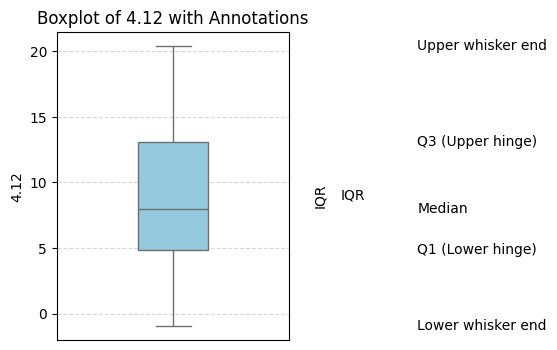

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
url = "https://www.stat.cmu.edu/~hseltman/309/Book/data/EDA2.dat"
df = pd.read_csv(url, delim_whitespace=True)

# Choose the column to plot (e.g., first column)
column = df.columns[0]
data = df[column].dropna()  # Remove NaN if any

# Calculate stats
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
median = np.median(data)
iqr = q3 - q1
lower_whisker = max(min(data), q1 - 1.5 * iqr)
upper_whisker = min(max(data), q3 + 1.5 * iqr)

# Set up the figure
plt.figure(figsize=(3, 4))
sns.boxplot(y=data, width=0.3, color='skyblue')

# Annotate boxplot
plt.text(1.05, median, 'Median', verticalalignment='center')
plt.text(1.05, q1, 'Q1 (Lower hinge)', verticalalignment='center')
plt.text(1.05, q3, 'Q3 (Upper hinge)', verticalalignment='center')
plt.text(1.05, lower_whisker, 'Lower whisker end', verticalalignment='center')
plt.text(1.05, upper_whisker, 'Upper whisker end', verticalalignment='center')
plt.text(0.6, (q1 + q3) / 2, 'IQR', rotation=90, verticalalignment='center', fontsize=10)

# Mark IQR with arrows
plt.annotate('', xy=(0.7, q3), xytext=(0.7, q1), arrowprops=dict(arrowstyle='<->'))
plt.text(0.72, (q1 + q3) / 2, 'IQR', verticalalignment='center')

# Title and axis
plt.title(f'Boxplot of {column} with Annotations')
plt.ylabel(column)
plt.xticks([])

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

**Important:** The term “outlier” is not well deﬁned in statistics, and the deﬁnition varies depending on the purpose and situation. The “outliers” identiﬁed by a boxplot, which could be called “boxplot outliers” are deﬁned as any points more than 1.5 IQRs above Q3 or more than 1.5 IQRs below Q1. This *does not* by itself indicate a problem with those data points.

The term **fat tails** is used to describe the situation where a histogram has a lot of values far from the mean.

# 1.8.4 Quantile-normal plots

It is used to see how well a particular sample follows a particular
theoretical distribution. Although it can be used for any theoretical distribution, we will limit our attention to Gaussian distribution.

✅ Steps to Construct a Q–Q Plot:
1.   Sort the sample data in ascending order.
2.   Compute theoretical quantiles from a reference distribution (e.g., normal).
3. Plot the sample quantiles (y-axis) vs. theoretical quantiles (x-axis) \\
4.  Check linearity: \\
    If the points lie close to a straight line → data follows the reference distribution.

<ipython-input-6-26985d8c2e1b>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True)


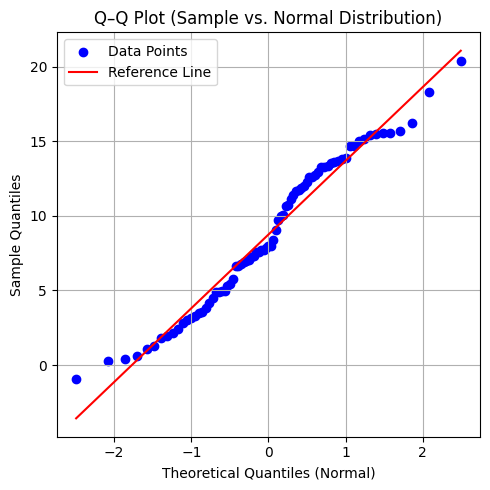

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Load and select data
url = "https://www.stat.cmu.edu/~hseltman/309/Book/data/EDA2.dat"
df = pd.read_csv(url, delim_whitespace=True)

# We'll use the first numeric column
data = df[df.columns[0]].dropna()
data_sorted = np.sort(data)

# Step 2: Compute theoretical quantiles from a normal distribution
n = len(data_sorted)
theoretical_quantiles = stats.norm.ppf((np.arange(1, n + 1) - 0.5) / n)

# Step 3: Plot the Q–Q plot manually
plt.figure(figsize=(5, 5))
plt.scatter(theoretical_quantiles, data_sorted, color='blue', label='Data Points')

# Step 4: Reference line (ideal match if normally distributed)
slope, intercept = np.polyfit(theoretical_quantiles, data_sorted, 1)
plt.plot(theoretical_quantiles, slope * theoretical_quantiles + intercept, color='red', label='Reference Line')

# Plot formatting
plt.title('Q–Q Plot (Sample vs. Normal Distribution)')
plt.xlabel('Theoretical Quantiles (Normal)')
plt.ylabel('Sample Quantiles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-7-c2537337c081>:34: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-7-c2537337c081>:34: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-7-c2537337c081>:34: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-7-c2537337c081>:34: UserWarning: Glyph 128681 (\N{TRIANGULAR FLAG ON POST}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-7-c2537337c081>:34: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  f

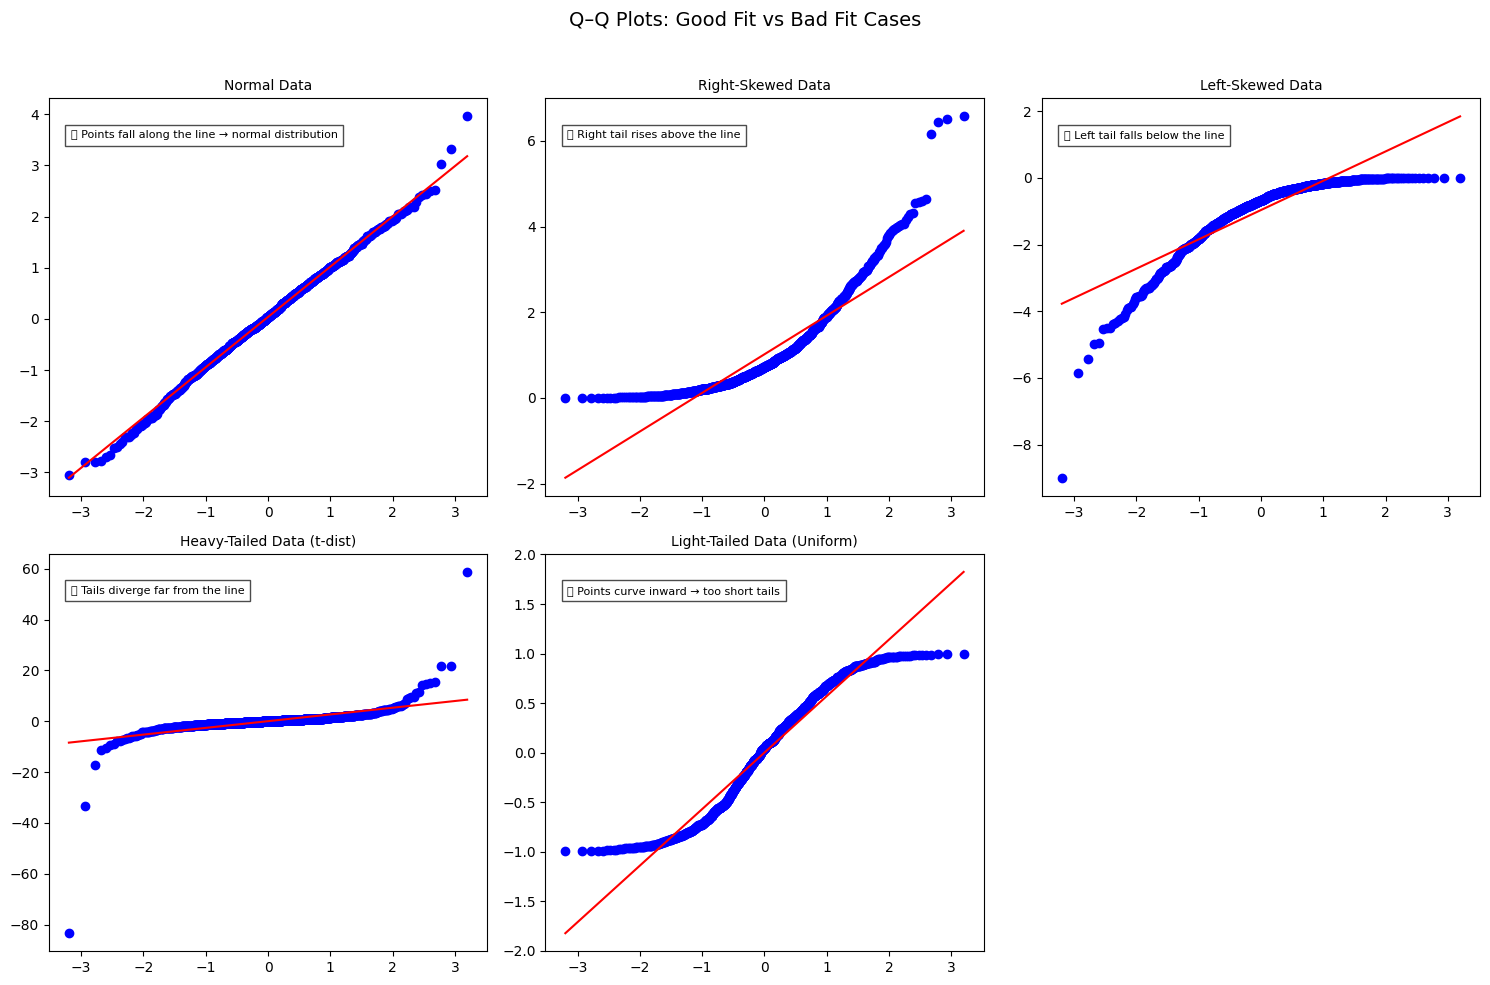

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define data types
np.random.seed(1)
data_normal = np.random.normal(0, 1, 1000)
data_right_skew = np.random.exponential(scale=1, size=1000)
data_left_skew = -np.random.exponential(scale=1, size=1000)
data_heavy_tailed = np.random.standard_t(df=2, size=1000)
data_light_tailed = np.random.uniform(-1, 1, 1000)

# Titles and comments
data_list = [
    (data_normal, "Normal Data", "✅ Points fall along the line → normal distribution"),
    (data_right_skew, "Right-Skewed Data", "📈 Right tail rises above the line"),
    (data_left_skew, "Left-Skewed Data", "📉 Left tail falls below the line"),
    (data_heavy_tailed, "Heavy-Tailed Data (t-dist)", "🚩 Tails diverge far from the line"),
    (data_light_tailed, "Light-Tailed Data (Uniform)", "🔍 Points curve inward → too short tails"),
]

# Plot setup
plt.figure(figsize=(15, 10))

for i, (data, title, comment) in enumerate(data_list, 1):
    plt.subplot(2, 3, i)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
    plt.text(0.05, 0.9, comment, transform=plt.gca().transAxes, fontsize=8, bbox=dict(facecolor='white', alpha=0.7))

plt.suptitle("Q–Q Plots: Good Fit vs Bad Fit Cases", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 1.9 Multivariate non-graphical EDA

Multivariate non-graphical EDA techniques generally show the relationship between two or more variables in the form of either cross-tabulation or statistics.

# 1.9.1 Cross-tabulation

For categorical data (and quantitative data with only a few diﬀerent values) an extension of tabulation called cross-tabulation is very useful.

### Table 4.1: Sample Data for Cross-tabulation

| Subject ID | Age Group | Sex |
|------------|-----------|-----|
| GW         | young     | F   |
| JA         | middle    | F   |
| TJ         | young     | M   |
| JMA        | young     | M   |
| JMO        | middle    | F   |
| JQA        | old       | F   |
| AJ         | old       | F   |
| MVB        | young     | M   |
| WHH        | old       | F   |
| JT         | young     | F   |
| JKP        | middle    | M   |

---

### Table 4.2: Cross-tabulation of Sample Data

| Age Group / Sex | Female | Male | Total |
|------------------|--------|------|--------|
| young            | 2      | 3    | 5      |
| middle           | 2      | 1    | 3      |
| old              | 3      | 0    | 3      |
| **Total**        | 7      | 4    | 11     |


## 1.9.2 Correlation for categorical data

Another statistic that can be calculated for two categorical variables is their correlation. But there are many forms of correlation for categorical variables, and that material is currently beyond the scope and will be studied later.

# 1.9.3 Univariate statistics by category

For one categorical variable (usually explanatory) and one quantitative variable (usually outcome), it is common to produce some of the standard univariate non-graphical statistics for the quantitative variables separately for each level of the categorical variable, and then compare the statistics across levels of the categorical variable. Comparing the means is an informal version of ANOVA. Comparing medians is a robust informal version of one-way ANOVA. Comparing measures of spread is a good informal test of the assumption of equal variances needed for valid analysis of variance.

Especially for a categorical explanatory variable and a quantitative
outcome variable, it is useful to produce a variety of univariate statis-
tics for the quantitative variable at each level of the categorical vari-
able.

# 1.9.4 Correlation and covariance

For two quantitative variables, the basic statistics of interest are the sample co-variance and/or sample correlation.

The sample covariance is a measure of how much two variables “co-vary”, i.e., how much (and in what direction) should we expect one variable to change when the other changes.

### 📐 Sample Covariance Formula

The formula for **sample covariance** between two variables \( X \) and \( Y \) is:
$
[
\text{Cov}(X, Y) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
]
$
Where:
- $( n )$ is the number of observations  
- $( x_i, y_i )$ are the individual sample points  
- $( \bar{x}, \bar{y} )$ are the sample means of $( X )$ and $( Y )$ respectively.

Positive covariance values suggest that when one measurement is above the
mean the other will probably also be above the mean, and vice versa. Negative covariances suggest that when one variable is above its mean, the other is below its mean. And covariances near zero suggest that the two variables vary independently of each other.

**Important**: Technically, independence implies zero correlation, but the reverse is not necessarily true.


Covariances tend to be hard to interpret, so we often use correlation instead. The correlation has the nice property that it is always between -1 and +1, with -1 being a “perfect” negative linear correlation, +1 being a perfect positive linear correlation and 0 indicating that $X$ and $Y$ are uncorrelated. The symbol $r$ or $r_{x,y}$ is often used for sample correlations.

### 📊 Table 4.3: Covariance Sample Data

| Subject ID | Age | Strength |
|------------|-----|----------|
| GW         | 38  | 20       |
| JA         | 62  | 15       |
| TJ         | 22  | 30       |
| JMA        | 38  | 21       |
| JMO        | 45  | 18       |
| JQA        | 69  | 12       |
| AJ         | 75  | 14       |
| MVB        | 38  | 28       |
| WHH        | 80  | 9        |
| JT         | 32  | 22       |
| JKP        | 51  | 20       |

---

### 🧮 Step-by-Step Computation

**Step 1: Compute Means**
$
[
\bar{X} = \text{Mean of Age} = \frac{38 + 62 + \dots + 51}{11} = \frac{550}{11} = 50.0
]
$ $
[
\bar{Y} = \text{Mean of Strength} = \frac{20 + 15 + \dots + 20}{11} = \frac{209}{11} \approx 19.0
]
$
---

**Step 2: Compute Deviations and Product of Deviations**

| Subject | \( X_i - \bar{X} \) | \( Y_i - \bar{Y} \) | Product |
|---------|----------------------|----------------------|---------|
| GW      | -12.0               | 1.0                 | -12.0   |
| JA      | 12.0                | -4.0                | -48.0   |
| TJ      | -28.0               | 11.0                | -308.0  |
| JMA     | -12.0               | 2.0                 | -24.0   |
| JMO     | -5.0                | -1.0                | 5.0     |
| JQA     | 19.0                | -7.0                | -133.0  |
| AJ      | 25.0                | -5.0                | -125.0  |
| MVB     | -12.0               | 9.0                 | -108.0  |
| WHH     | 30.0                | -10.0               | -300.0  |
| JT      | -18.0               | 3.0                 | -54.0   |
| JKP     | 1.0                 | 1.0                 | 1.0     |

Sum of products = **-1106.0**

---

**Step 3: Compute Sample Covariance**

$[
\text{Cov}(X, Y) = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{n - 1} = \frac{-1106}{10} = -110.6
]$

---

**Step 4: Compute Standard Deviations**

- $( s_X = \sqrt{\frac{\sum (X_i - \bar{X})^2}{n - 1}} \approx 18.63 )$  
- $( s_Y = \sqrt{\frac{\sum (Y_i - \bar{Y})^2}{n - 1}} \approx 6.82 )$

---

**Step 5: Compute Correlation Coefficient**

$[
r = \frac{\text{Cov}(X, Y)}{s_X s_Y} = \frac{-110.6}{(18.63)(6.82)} \approx \frac{-110.6}{127.1} \approx -0.87
]$

---

### ✅ Final Results:

- **Sample Covariance** = **–110.6**  
- **Sample Correlation** = **–0.87** (strong negative relationship)


When we have many quantitative variables the most common non-graphical EDA
technique is to calculate all of the **Pairwise Covariances and/or Correlations** and assemble them into a matrix.

### 📊 Table 4.4: Covariance Calculation

| Subject ID | Age | Strength | Age - 50 | Str - 19 | Product |
|------------|-----|----------|----------|----------|---------|
| GW         | 38  | 20       | -12      | +1       | -12     |
| JA         | 62  | 15       | +12      | -4       | -48     |
| TJ         | 22  | 30       | -28      | +11      | -308    |
| JMA        | 38  | 21       | -12      | +2       | -24     |
| JMO        | 45  | 18       | -5       | -1       | +5      |
| JQA        | 69  | 12       | +19      | -7       | -133    |
| AJ         | 75  | 14       | +25      | -5       | -125    |
| MVB        | 38  | 28       | -12      | +9       | -108    |
| WHH        | 80  | 9        | +30      | -10      | -300    |
| JT         | 32  | 22       | -18      | +3       | -54     |
| JKP        | 51  | 20       | +1       | +1       | +1      |
| **Total**  |     |          | **0**    | **0**    | **-1106** |

---

### 🧮 Table 4.5: A Covariance Matrix

|       | X    | Y    | Z    |
|-------|------|------|------|
| **X** | 5.00 | 1.77 | -2.24 |
| **Y** | 1.77 | 7.0  | 3.17  |
| **Z** | -2.24| 3.17 | 4.0   |

## 1.9.4 Multivariate Graphical EDA

When we have one categorical (usually explanatory) and one quantitative (usually outcome) variable, graphical EDA usually takes the form of “conditioning” on the categorical random variable.

   ID  Age AgeGroup  Strength Sex Party
0   1   27  (21,42]        26   F   Rep
1   2   58  (42,62]        22   F   Rep
2   3   32  (21,42]        29   F   Dem
3   4   51  (42,62]        18   F   Dem
4   5   38  (21,42]        28   F   Rep


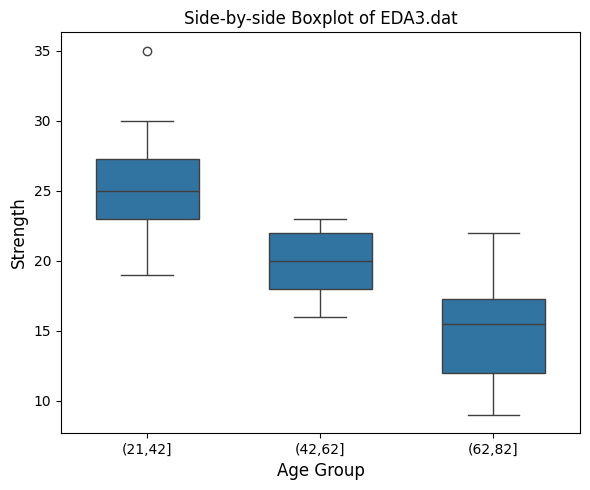

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
url = "https://www.stat.cmu.edu/~hseltman/309/Book/data/EDA3.dat"
df = pd.read_csv(url, sep='\s+')

# Display the first few rows to understand the data
print(df.head())

# Step 1: Create Age Group bins
bins = [21, 42, 62, 82]
labels = ["(21,42]", "(42,62]", "(62,82]"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

# Step 2: Create the boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(x="Age Group", y="Strength", data=df, width=0.6)

# Step 3: Customize plot
plt.title("Side-by-side Boxplot of EDA3.dat", fontsize=12)
plt.ylabel("Strength", fontsize=12)
plt.xlabel("Age Group", fontsize=12)

plt.tight_layout()
plt.show()

For two quantitative variables, the basic graphical EDA technique is the scatterplot which has one variable on the x-axis, one on the y-axis and a point for each case in your dataset. If one variable is explanatory and the other is outcome, it is a very, very strong convention to put the outcome on the y (vertical) axis.

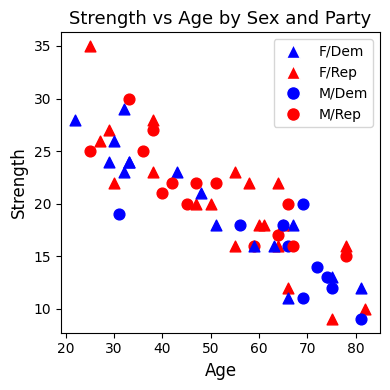

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://www.stat.cmu.edu/~hseltman/309/Book/data/EDA3.dat"
df = pd.read_csv(url, sep="\s+")

# Define color and marker by Sex/Party combination
def color_marker(row):
    if row["Sex"] == "F" and row["Party"] == "Dem":
        return ("blue", "^")   # triangle, blue
    elif row["Sex"] == "F" and row["Party"] == "Rep":
        return ("red", "^")    # triangle, red
    elif row["Sex"] == "M" and row["Party"] == "Dem":
        return ("blue", "o")   # circle, blue
    elif row["Sex"] == "M" and row["Party"] == "Rep":
        return ("red", "o")    # circle, red

# Add color and marker columns
df[["Color", "Marker"]] = df.apply(color_marker, axis=1, result_type='expand')

# Create plot
plt.figure(figsize=(4, 4))

for _, row in df.iterrows():
    plt.scatter(row["Age"], row["Strength"], color=row["Color"], marker=row["Marker"], s=60)

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='^', color='w', markerfacecolor='blue', markersize=10, label='F/Dem'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='red', markersize=10, label='F/Rep'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='M/Dem'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='M/Rep'),
]
plt.legend(handles=legend_elements, loc='upper right')

# Labels
plt.xlabel("Age", fontsize=12)
plt.ylabel("Strength", fontsize=12)
plt.title("Strength vs Age by Sex and Party", fontsize=13)
plt.grid(False)
plt.tight_layout()
plt.show()